In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv(
    "C:/Users/Home/Desktop/Respaldo Babahoyo/Lecturas para Investigaciones/BDDenemdu_personas_2024_anual.csv",
    sep=";",
    low_memory=False
)


In [2]:
df


,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,prov,dominio,pobreza,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes
0,1,10150,304,42,1,1,1,1,31,1,...,1,3,0,0,10150000304,101500003040420103,01015000030404201103,0101500003040420110103,202403,3
1,1,10150,304,42,1,1,2,2,39,2,...,1,3,0,0,10150000304,101500003040420103,01015000030404201103,0101500003040420110203,202403,3
2,1,10150,304,42,1,1,3,1,7,7,...,1,3,0,0,10150000304,101500003040420103,01015000030404201103,0101500003040420110303,202403,3
3,1,10150,304,42,1,1,4,1,1,3,...,1,3,0,0,10150000304,101500003040420103,01015000030404201103,0101500003040420110403,202403,3
4,1,10150,304,42,1,1,1,1,31,1,...,1,3,0,0,10150000304,101500003040420106,01015000030404201106,0101500003040420110106,202406,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341389,1,240352,3202,43,9,1,2,1,58,2,...,24,6,0,0,240352003202,2403520032020430910,24035200320204309110,2403520032020430910210,202410,10
341390,1,240352,3202,43,9,1,3,2,23,3,...,24,6,0,0,240352003202,2403520032020430910,24035200320204309110,2403520032020430910310,202410,10
341391,1,240352,3202,43,9,1,4,2,18,3,...,24,6,0,0,240352003202,2403520032020430910,24035200320204309110,2403520032020430910410,202410,10
341392,1,240352,3202,43,9,1,5,1,14,7,...,24,6,0,0,240352003202,2403520032020430910,24035200320204309110,2403520032020430910510,202410,10


In [5]:
# Lista de códigos de ciudad del Censo ENEMDU para la provincia de Los Ríos
codigos_los_rios = [
    120150, 120152, 120153, 120154, 120155,  # Babahoyo
    120250, 120251, 120252,                 # Baba
    120350,                                 # Montalvo
    120450, 120451, 120452,                 # Puebloviejo
    120550, 120553, 120555,                 # Quevedo
    120650, 120651,                         # Urdaneta
    120750, 120752,                         # Ventanas
    120850, 120851,                         # Vinces
    120950,                                 # Palenque
    121050, 121051,                         # Buena Fe
    121150,                                 # Valencia
    121250,                                 # Mocache
    121350                                  # Quinsaloma
]

# Filtrar solo los registros correspondientes a esas ciudades
df_rios = df[df['ciudad'].isin(codigos_los_rios)]

# Verificar dimensiones del nuevo DataFrame
print(df_rios.shape)

(6479, 139)


In [7]:
print(df_rios['ciudad'].unique())
print(df_rios['ciudad'].dtype)

[120150 120152 120153 120154 120155 120250 120251 120252 120350 120450
 120451 120452 120550 120651 120750 120752 120850 120851 120950 121050
 121051 121150 121250 121350]
int64


In [9]:
# Filtrar población objetivo: personas entre 5 y 17 años con info educativa
df_menores = df_rios[(df_rios['p03'] >= 5) & (df_rios['p03'] <= 17)].copy()



In [15]:
df_menores['p07'] = df_menores['p07'].replace({1: 1, 2: 0}).astype("Int64")



In [17]:
print(df_menores['p07'].value_counts())


p07
1    1269
0     112
Name: count, dtype: Int64


In [23]:
df_menores['p20'] = df_menores['p20'].replace({1: 1, 2: 0}).astype("Int64")


In [25]:
print(df_menores['p20'].value_counts())

p20
0    1348
1      33
Name: count, dtype: Int64


In [27]:
df_menores['area'] = df_menores['area'].replace({1: 1, 2: 0}).astype("Int64")


In [29]:
print(df_menores['area'].value_counts())


area
0    698
1    683
Name: count, dtype: Int64


In [31]:
df_menores['p02'] = df_menores['p02'].replace({1: 0, 2: 1}).astype("Int64")


In [33]:
print(df_menores['p02'].value_counts())


p02
0    736
1    645
Name: count, dtype: Int64


In [35]:
df_menores['p04'] = (df_menores['p04'] == 3).astype("Int64")


In [37]:
print(df_menores['p04'].value_counts())


p04
1    949
0    432
Name: count, dtype: Int64


In [39]:
print(df_menores['pobreza'].value_counts())


pobreza
0    1012
1     365
        4
Name: count, dtype: int64


In [41]:
# Definir variables
vars_modelo = ['area', 'p02', 'p03', 'p04', 'p20', 'pobreza', 'epobreza']

# Crear subconjunto de datos
X = df_menores[vars_modelo].copy()
y = df_menores['p07']

# Revisar valores faltantes
print("Valores faltantes en X:")
print(X.isnull().sum())

print("\nValores faltantes en y:")
print(y.isnull().sum())


Valores faltantes en X:
area        0
p02         0
p03         0
p04         0
p20         0
pobreza     0
epobreza    0
dtype: int64

Valores faltantes en y:
0


In [43]:
print(X.dtypes)


area         Int64
p02          Int64
p03          int64
p04          Int64
p20          Int64
pobreza     object
epobreza    object
dtype: object


In [45]:
print(X.dtypes)

area         Int64
p02          Int64
p03          int64
p04          Int64
p20          Int64
pobreza     object
epobreza    object
dtype: object


In [47]:
df_menores['pobreza'] = pd.to_numeric(df_menores['pobreza'].replace(r'^\s*$', pd.NA, regex=True), errors='coerce').astype('Int64')
df_menores['epobreza'] = pd.to_numeric(df_menores['epobreza'].replace(r'^\s*$', pd.NA, regex=True), errors='coerce').astype('Int64')


In [49]:
print(df_menores[['pobreza', 'epobreza']].dtypes)

pobreza     Int64
epobreza    Int64
dtype: object


In [51]:
print(df_menores[['pobreza', 'epobreza']].isnull().sum())

pobreza     4
epobreza    4
dtype: int64


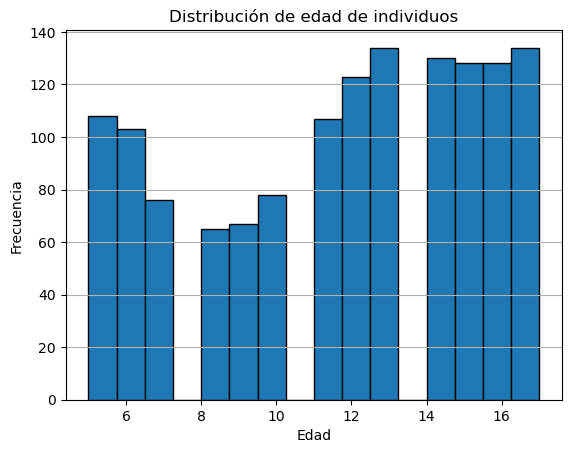

In [101]:
df_menores['p03'].plot.hist(bins=16, edgecolor='black')
plt.title('Distribución de edad de individuos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

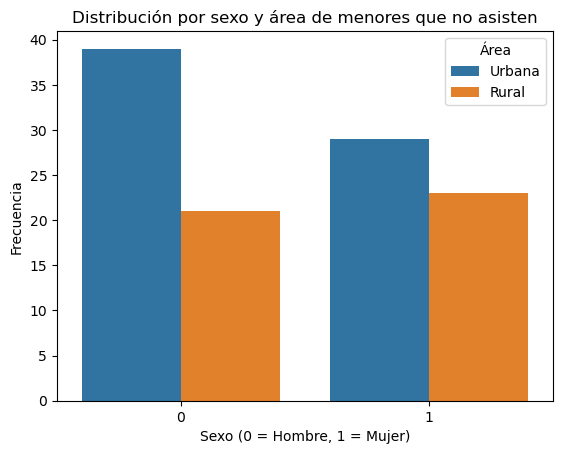

In [120]:
import seaborn as sns

sns.countplot(data=no_asisten, x='p02', hue='area')
plt.title('Distribución por sexo y área de menores que no asisten')
plt.xlabel('Sexo (0 = Hombre, 1 = Mujer)')
plt.ylabel('Frecuencia')
plt.legend(title='Área', labels=['Urbana', 'Rural'])
plt.show()

In [53]:
vars_modelo = ['area', 'p02', 'p03', 'p04', 'p20', 'pobreza', 'epobreza']
X = df_menores[vars_modelo]
y = df_menores['p07']



In [55]:
# Eliminar observaciones con valores faltantes
df_modelo = pd.concat([X, y], axis=1).dropna()
X = df_modelo[vars_modelo]
y = df_modelo['p07']


In [57]:
print(X.dtypes)


area        Int64
p02         Int64
p03         int64
p04         Int64
p20         Int64
pobreza     Int64
epobreza    Int64
dtype: object


In [59]:
# Paso 1: Definir las variables
vars_modelo = ['area', 'p02', 'p03', 'p04', 'p20', 'pobreza', 'epobreza']
X = df_menores[vars_modelo].copy()
y = df_menores['p07']




In [61]:
# Paso 2: Eliminar valores faltantes
df_modelo = pd.concat([X, y], axis=1).dropna()
X = df_modelo[vars_modelo]
y = df_modelo['p07']



In [63]:
# Paso 3: Forzar conversión TOTAL a float64 (tipo universalmente aceptado para regresión y VIF)
X = X.astype("float64")



In [65]:
# Paso 4: Agregar constante
import statsmodels.api as sm
X = sm.add_constant(X)



### ***MODELADO ESTADISTICO***

$$
VIF_j = \frac{1}{1 - R_j^2}
$$

Donde \$R_j^2 \$ es el coeficiente de determinación al regredir la variable explicativa \$ X_j \$ contra todas las demás.


In [72]:
# Paso 5: Calcular VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

   Variable        VIF
0     const  15.097398
1      area   1.030150
2       p02   1.016479
3       p03   1.078886
4       p04   1.053868
5       p20   1.049664
6   pobreza   1.160202
7  epobreza   1.154225


**Resultados de prueba de Multicolinealidad**
| Variable     | VIF   |
|--------------|-------|
| \( area_i \)       | 1.12 |
| \( p02_i \)        | 1.06 |
| \( p03_i \)        | 2.23 |
| \( p04_i \)        | 1.89 |
| \( p20_i \)        | 1.14 |
| \( pobreza_i \)    | 1.98 |
| \( epobreza_i \)   | 2.07 |


### Modelo Logit

$$
\text{logit}(p_i) = \log\left( \frac{p_i}{1 - p_i} \right) =
\beta_0 + \beta_1 \cdot \text{area}_i +
\beta_2 \cdot \text{p02}_i +
\beta_3 \cdot \text{p03}_i +
\beta_4 \cdot \text{p04}_i +
\beta_5 \cdot \text{p20}_i +
\beta_6 \cdot \text{pobreza}_i +
\beta_7 \cdot \text{epobreza}_i
$$

**Donde:**

| Variable           | Descripción                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| $p_i$              | Probabilidad de que el individuo asista a clases ($p07_i = 1$)              |
| $\text{area}_i$    | Área de residencia (1 = urbana, 0 = rural)                                  |
| $\text{p02}_i$     | Sexo del individuo (0 = hombre, 1 = mujer)                                  |
| $\text{p03}_i$     | Edad del individuo, en años                                                 |
| $\text{p04}_i$     | Relación de parentesco con el jefe del hogar (codificada numéricamente)     |
| $\text{p20}_i$     | Trabajó la semana pasada (1 = sí, 0 = no)                                   |
| $\text{pobreza}_i$ | Indicador de pobreza (1 = pobre, 0 = no pobre)                              |
| $\text{epobreza}_i$| Indicador de pobreza extrema (1 = sí, 0 = no)                               |




### Los resultados del modelo logit estimado son los siguientes:

In [77]:
modelo_logit = sm.Logit(y, X).fit()
print(modelo_logit.summary())


Optimization terminated successfully.
         Current function value: 0.234026
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    p07   No. Observations:                 1377
Model:                          Logit   Df Residuals:                     1369
Method:                           MLE   Df Model:                            7
Date:                Sat, 19 Jul 2025   Pseudo R-squ.:                  0.1650
Time:                        17:30:38   Log-Likelihood:                -322.25
converged:                       True   LL-Null:                       -385.91
Covariance Type:            nonrobust   LLR p-value:                 2.281e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7974      0.540      8.891      0.000       3.740       5.855
area           0.3078      0.

 ### Efectos Marginales en el Modelo Logit

$$
\frac{\partial \mathbb{E}[Y]}{\partial X_j} = \beta_j \cdot f(X'\beta)
$$



**Donde:**

| Variable           | Descripción                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| $\mathbb{E}[Y]$    | Valor esperado de la variable dependiente (probabilidad de asistir a clases) |
| $X_j$              | Variable explicativa individual (por ejemplo, $p03_i$ o $p20_i$)            |
| $\beta_j$          | Coeficiente del modelo logit asociado a la variable $X_j$                  |
| $f(X'\beta)$       | Densidad logística evaluada en $X'\beta$                                   |
| $X'\beta$          | Combinación lineal de todas las variables explicativas del modelo          |





*El efecto marginal mide el cambio en la probabilidad de asistir a clases ante una unidad de cambio en \$X_j$ , manteniendo constantes las demás variables.*


### Resultados de los Efectos Marginales del Modelo Logit

Los coeficientes presentados corresponden a los efectos marginales promedio (\$( dy/dx \$)) estimados sobre la probabilidad de asistir a clases (\( p07 \)):



In [83]:
mfx = modelo_logit.get_margeff()
print(mfx.summary())


        Logit Marginal Effects       
Dep. Variable:                    p07
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
area           0.0190      0.014      1.366      0.172      -0.008       0.046
p02           -0.0211      0.014     -1.522      0.128      -0.048       0.006
p03           -0.0109      0.002     -4.717      0.000      -0.015      -0.006
p04            0.0180      0.015      1.212      0.226      -0.011       0.047
p20           -0.2058      0.027     -7.664      0.000      -0.258      -0.153
pobreza       -0.0126      0.016     -0.778      0.436      -0.044       0.019
epobreza      -0.0113      0.031     -0.365      0.715      -0.072       0.050


In [86]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Obtener probabilidades predichas del modelo
y_prob = modelo_logit.predict(X)

# Convertir a clases (0 o 1) con umbral 0.5
y_pred = (y_prob >= 0.5).astype(int)


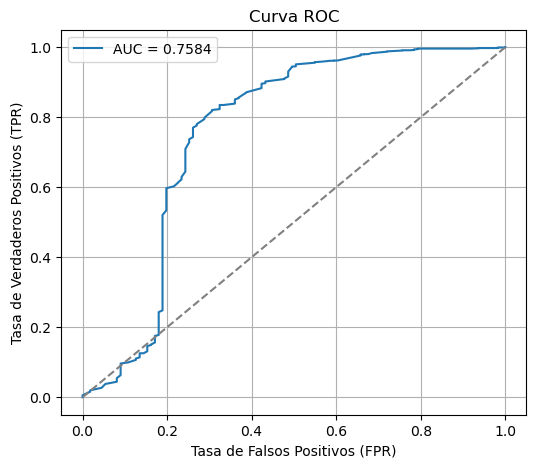

In [87]:
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()


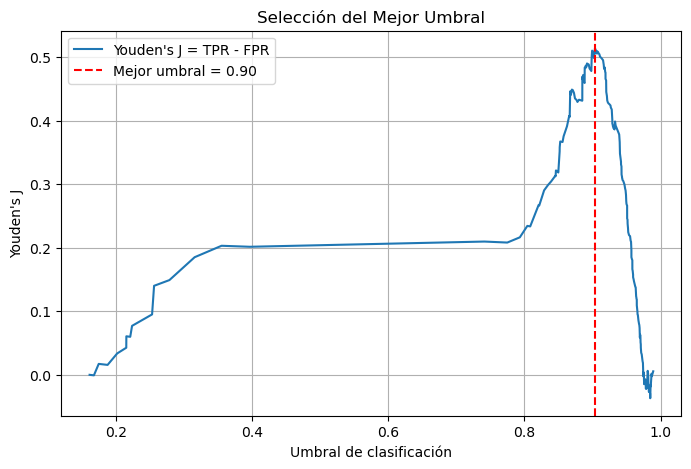

Mejor umbral según Youden's J: 0.9036


In [90]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Calcular puntos ROC
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Calcular Youden's J statistic
youden_j = tpr - fpr
best_threshold_index = np.argmax(youden_j)
best_threshold = thresholds[best_threshold_index]

# Graficar TPR - FPR para cada umbral
plt.figure(figsize=(8, 5))
plt.plot(thresholds, youden_j, label="Youden's J = TPR - FPR")
plt.axvline(best_threshold, color='r', linestyle='--', label=f"Mejor umbral = {best_threshold:.2f}")
plt.xlabel('Umbral de clasificación')
plt.ylabel("Youden's J")
plt.title("Selección del Mejor Umbral")
plt.legend()
plt.grid(True)
plt.show()

print(f"Mejor umbral según Youden's J: {best_threshold:.4f}")


In [92]:
from sklearn.metrics import confusion_matrix, classification_report

# Aplicar el mejor umbral
y_pred_optimo = (y_prob >= best_threshold).astype(int)

# Matriz de confusión
print(confusion_matrix(y, y_pred_optimo))

# Métricas: precision, recall, f1-score
print(classification_report(y, y_pred_optimo, digits=4))


[[  77   34]
 [ 227 1039]]
              precision    recall  f1-score   support

         0.0     0.2533    0.6937    0.3711       111
         1.0     0.9683    0.8207    0.8884      1266

    accuracy                         0.8105      1377
   macro avg     0.6108    0.7572    0.6297      1377
weighted avg     0.9107    0.8105    0.8467      1377



In [94]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

metrics = {
    "Precision": precision_score(y, y_pred_optimo),
    "Recall (Sensibilidad)": recall_score(y, y_pred_optimo),
    "F1-score": f1_score(y, y_pred_optimo),
    "AUC": roc_auc_score(y, y_prob)
}

import pandas as pd
tabla_metrics = pd.DataFrame.from_dict(metrics, orient='index', columns=['Valor'])
print(tabla_metrics)


                          Valor
Precision              0.968313
Recall (Sensibilidad)  0.820695
F1-score               0.888414
AUC                    0.758401


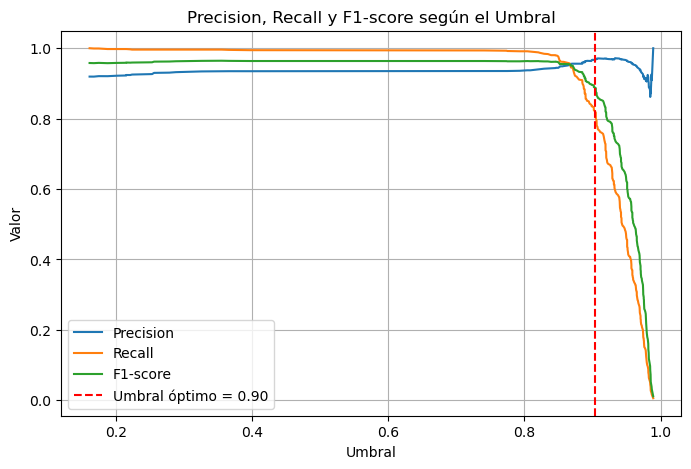

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y, y_prob)
f1_scores = 2 * precision * recall / (precision + recall)

plt.figure(figsize=(8, 5))
plt.plot(thresholds_pr, precision[:-1], label='Precision')
plt.plot(thresholds_pr, recall[:-1], label='Recall')
plt.plot(thresholds_pr, f1_scores[:-1], label='F1-score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Umbral óptimo = {best_threshold:.2f}')
plt.xlabel('Umbral')
plt.ylabel('Valor')
plt.title('Precision, Recall y F1-score según el Umbral')
plt.legend()
plt.grid(True)
plt.show()
